# Part II - Key Variables Influencing the Turnout of Trips
## by Salima Omari

## Investigation Overview
In this presentation, I would be looking into the variables that have a relationship or influencing the number of trips and duration of trip in the FordGo bike sharing system in San Fransisco. The main focus would be on the month of the year, day of the week, member gender, member usertype, and member age group. 

## Dataset Overview

The dataset consist of individual rides made in a bike-sharing system by Ford covering the greater San Francisco Bay area in 2018. It consist of about 1.86 million trips. Trips with user above 80 years old were dropped due to its rare case and insignificant effect to the data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load dataset by joining all individual monthly data to one dataframe
nums=['02','03','04','05','06','07','08','09','10','11','12']
trip_data=pd.read_csv('201801-fordgobike-tripdata.csv')
for i in nums:
    df=pd.read_csv('2018'+i+'-fordgobike-tripdata.csv')
    trip_data=trip_data.append(df)
    

##### Data wrangling

In [3]:
# drop all missing values
trip_data=trip_data.dropna()

# convert the 'start_time' and 'end_time' columns to datetime format

trip_data['start_time']= pd.to_datetime(trip_data['start_time'])
trip_data['end_time']= pd.to_datetime(trip_data['end_time'])

In [4]:
# Create new column for user age from their birth year
from datetime import date

current_year = date.today().year
trip_data['user_age']=current_year-trip_data['member_birth_year']

# convert the new column to integar datatype
trip_data['user_age'] = trip_data['user_age'].astype(int)

In [5]:
# convert start_station_id, end_station_id,bike_id columns to string datatype
trip_data['start_station_id'] = trip_data['start_station_id'].astype(str)
trip_data['end_station_id'] = trip_data['end_station_id'].astype(str)
trip_data['bike_id'] = trip_data['bike_id'].astype(str)

In [6]:
# change the trip duration time from seconds to minutes
trip_data['trip_duration(mins)']= trip_data['duration_sec']/60
trip_data['trip_duration(mins)'] = trip_data['trip_duration(mins)'].astype(int)

In [7]:
# create columns for day name, month and date
trip_data['day_of_Week'] = trip_data['end_time'].dt.day_name()
trip_data['month'] = trip_data['end_time'].dt.month_name()
trip_data['date'] = trip_data['end_time'].dt.date
trip_data['hour'] = trip_data['start_time'].dt.hour

In [8]:
# get rows with ages less than 81
trip_data=trip_data[trip_data['user_age']<81]

## Age Distribution of Users

The most frequent users fall between the age of 30-35 after which the frequency of users seem to reduce as the user age increases. Teenagers do not seem to be part of the users and there are quite few users above 80 still going on trips.

In [9]:
def CreateHistplot(x,bins,xlabel):
    plt.figure(figsize=[12, 5])
    plt.hist(data = trip_data, x = x, bins = bins)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel('Number of trips',fontsize=15)
    plt.title('Distribution of {}'.format(xlabel),fontsize=25)
 

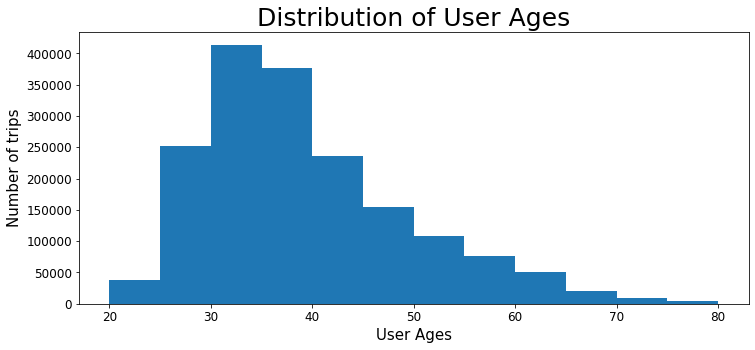

In [10]:
#### How does the Age distribution of users look like ?
binsize = 5
bins = np.arange(20, trip_data['user_age'].max()+binsize, binsize)

CreateHistplot('user_age',bins,'User Ages')

## Distribution of Trip Duration

Looking at the log scale, it is can be seen that the distribution is skewed to the left. Users mostly have short trips between 5 and 10 mins. Very few users go for long trips above 50 minutes. It can observe that there are possible outliers, however we will not be dropping it as it poses to be a significant part of long trips. Moving forward We will like to find answer to some questions.

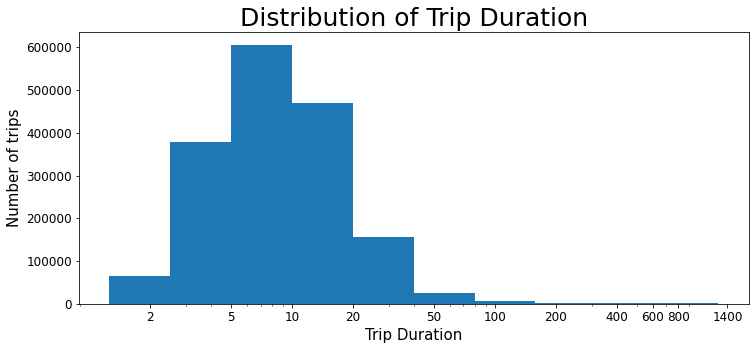

In [11]:
bins = 10 ** np.arange(0.1, 3.2, 0.3)

CreateHistplot('trip_duration(mins)',bins,'Trip Duration')
plt.xscale('log')
plt.xticks([2,5,10,20,50,100,200,400,600,800,1400], [2,5,10,20,50,100,200,400,600,800,1400],fontsize=12)

plt.show()

## Frequency distrution of trips in each month and week days of the year 

It is observed that more trips happen between From May till October of which October has the most frequent trip, while there is less frequency in trips in the other months with January having the least number of bike trips. Week days also have more trips than weekends.

In [12]:
def CreateCountPlot(df,x,title, ax=None, order=None,hue=None,palette = None):
    
    sns.countplot(data=df, x=x,color='indigo',ax=ax,order=order,hue=hue,palette = palette);
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(x,fontsize=15)
    plt.ylabel('Counts',fontsize=15)
    plt.title(title,fontsize=25)
  

In [13]:
x=['month','day_of_Week']
order=[['January','February','March','April','May','June','July','August','September','October','November','December'],
      ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
default_color = sns.color_palette()[0]

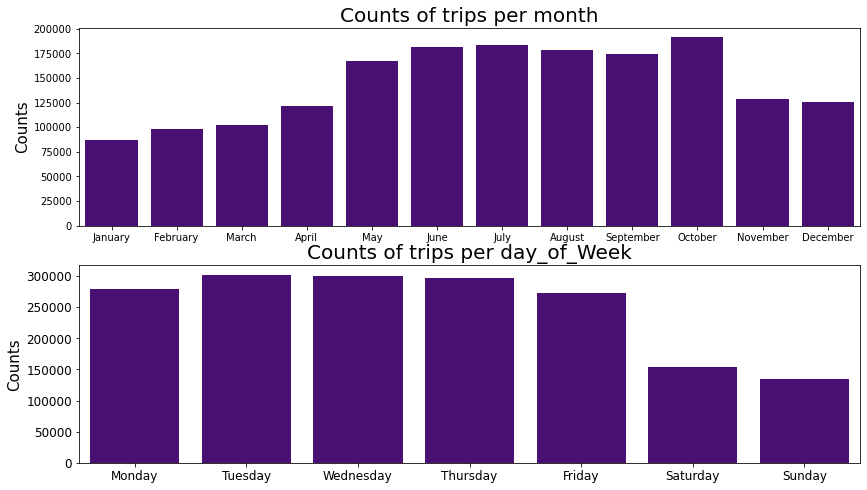

In [14]:
fig, ax = plt.subplots(nrows=2, figsize = [14,8])
for i in range (2):
    CreateCountPlot(trip_data,x[i],'Counts of trips per {}'.format(x[i]), ax = ax[i],order=order[i],hue=None)
    ax[i].set_title('Counts of trips per {}'.format(x[i]), fontsize=20)
    ax[i].set(xlabel=None);
    ax[i].set_ylabel('Counts', fontsize=15)


### Percentage distribution of gender and user types.

We have a very large percentage of male users and 89% of the users have subscription membership.

In [15]:
def GetPercent(col):
    user_type_count=trip_data[col].value_counts()
    m=100/(user_type_count.sum())
    percent_user_type=user_type_count*m

    data = percent_user_type.values
    keys = percent_user_type.index
    return data,keys


def CreatePieChart(data,keys,title_suffix):
    sns.set(font_scale=1)
    
    # define Seaborn color palette to use
    palette_color = sns.color_palette('terrain_r')

    # plotting data on chart
    plt.pie(data, colors=palette_color, autopct='%.0f%%')
    plt.legend(keys)
    plt.title(label="Percentage distribution of {}".format(title_suffix),
              fontsize=20)

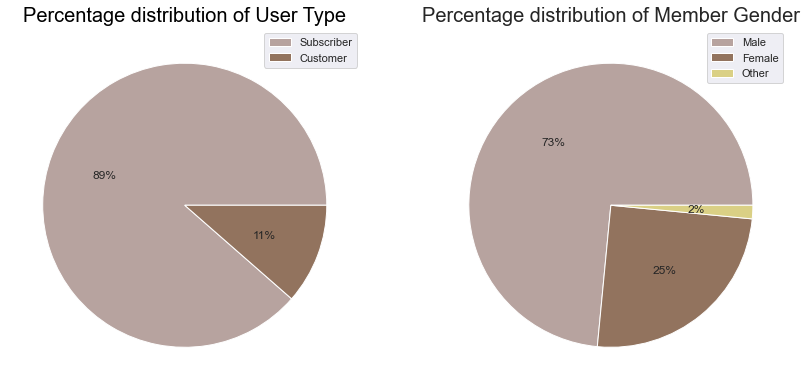

In [16]:
plt.figure(figsize=[14, 8]) 
plt.subplot(1,2,1)
data=GetPercent('user_type')

# plotting data on chart
CreatePieChart(data[0],data[1],'User Type')
plt.subplot(1,2,2)
data=GetPercent('member_gender')

# plotting data on chart
CreatePieChart(data[0],data[1],'Member Gender')

### Months and days with the longest average duration covered in trips
June till September shows the longest average trip duration, which mostly also falls on weekends.

In [17]:
def CreateBarPlot(df,y,x,title, ax=None, order=None,hue=None):
    sns.set(font_scale=4)
    sns.barplot(data=df, y=y, x=x,color = "indigo",ax=ax,order=order,hue=hue);
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=6)
    plt.xlabel(x,fontsize=15)
    plt.ylabel(y,fontsize=15)
    plt.title(title,fontsize=20)
    
  

In [18]:
# Create and sort datafraem for average trip duration per months
df=trip_data[['trip_duration(mins)','month','day_of_Week']].groupby(['month','day_of_Week']).mean()
df=df.reset_index()
df=df.sort_values(by='trip_duration(mins)')

x=['month','day_of_Week']
order=[['January','February','March','April','May','June','July','August','September','October','November','December'],
      ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
default_color = sns.color_palette()[0]

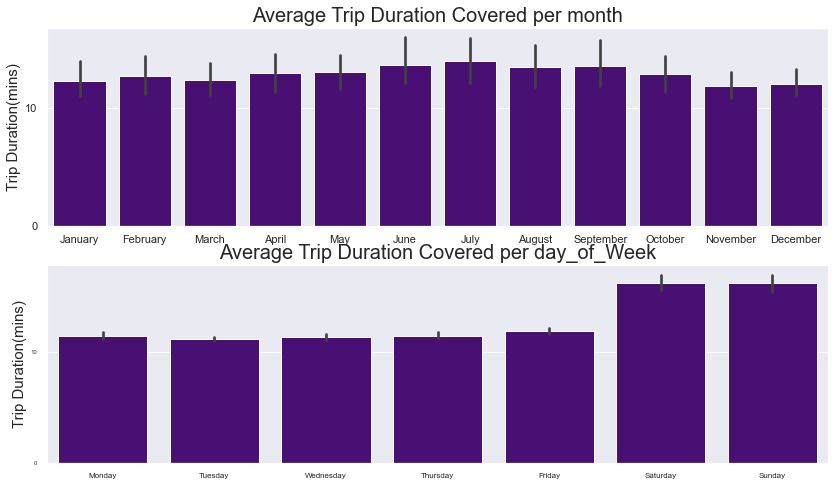

In [19]:
# Create bar subplots 
fig, ax = plt.subplots(nrows=2, figsize=[14, 8])
for i in range (2):
    CreateBarPlot(df,'trip_duration(mins)',x[i],'Average Trip Duration Covered per {}'.format(x[i]), ax=ax[i], order=order[i])
    ax[i].set_title('Average Trip Duration Covered per {}'.format(x[i]), fontsize=20)
    ax[i].set(xlabel=None);
    ax[i].set_ylabel('Trip Duration(mins)', fontsize=15)

### Average Distribution of Trip Duration Across User Type and Gender

From the above plots, Female users tend to go on longer trips than other genders. Also customer user types go for longer trips. It can also be seen that these customer user type do not partake in bike sharing.

In [20]:
# Custom Function to  craete facetgrid
def CreateFacetGrid(font_scale,size,df,title,plottype, col,x,y=None,hue=None,col_wrap=3,color=None,palette=None,legend_title=None,col_order=None):
    df=df.reset_index()
    df=df.sort_values(by='trip_duration(mins)')

    sns.set(font_scale=font_scale)
    g = sns.FacetGrid(data = df, col = col,col_order=col_order,size = size,col_wrap=col_wrap)
    g.fig.suptitle(title);
    if hue==None and plottype=='countplot':
        g.map(sns.countplot, x, palette=palette)
    else:
        g.map(sns.barplot, x, y,hue, palette=palette)
    g.add_legend(title=legend_title); 
    return g

In [21]:
# Group data by usertype and gender
df=trip_data[['trip_duration(mins)','user_type','bike_share_for_all_trip','member_gender']].groupby(['user_type','bike_share_for_all_trip','member_gender']).mean()

title='Average Distribution of Trip Duration Across User Type and Gender'
legend_title='Bike sharing for all trip'
xticks=['Subscriber','Customer']


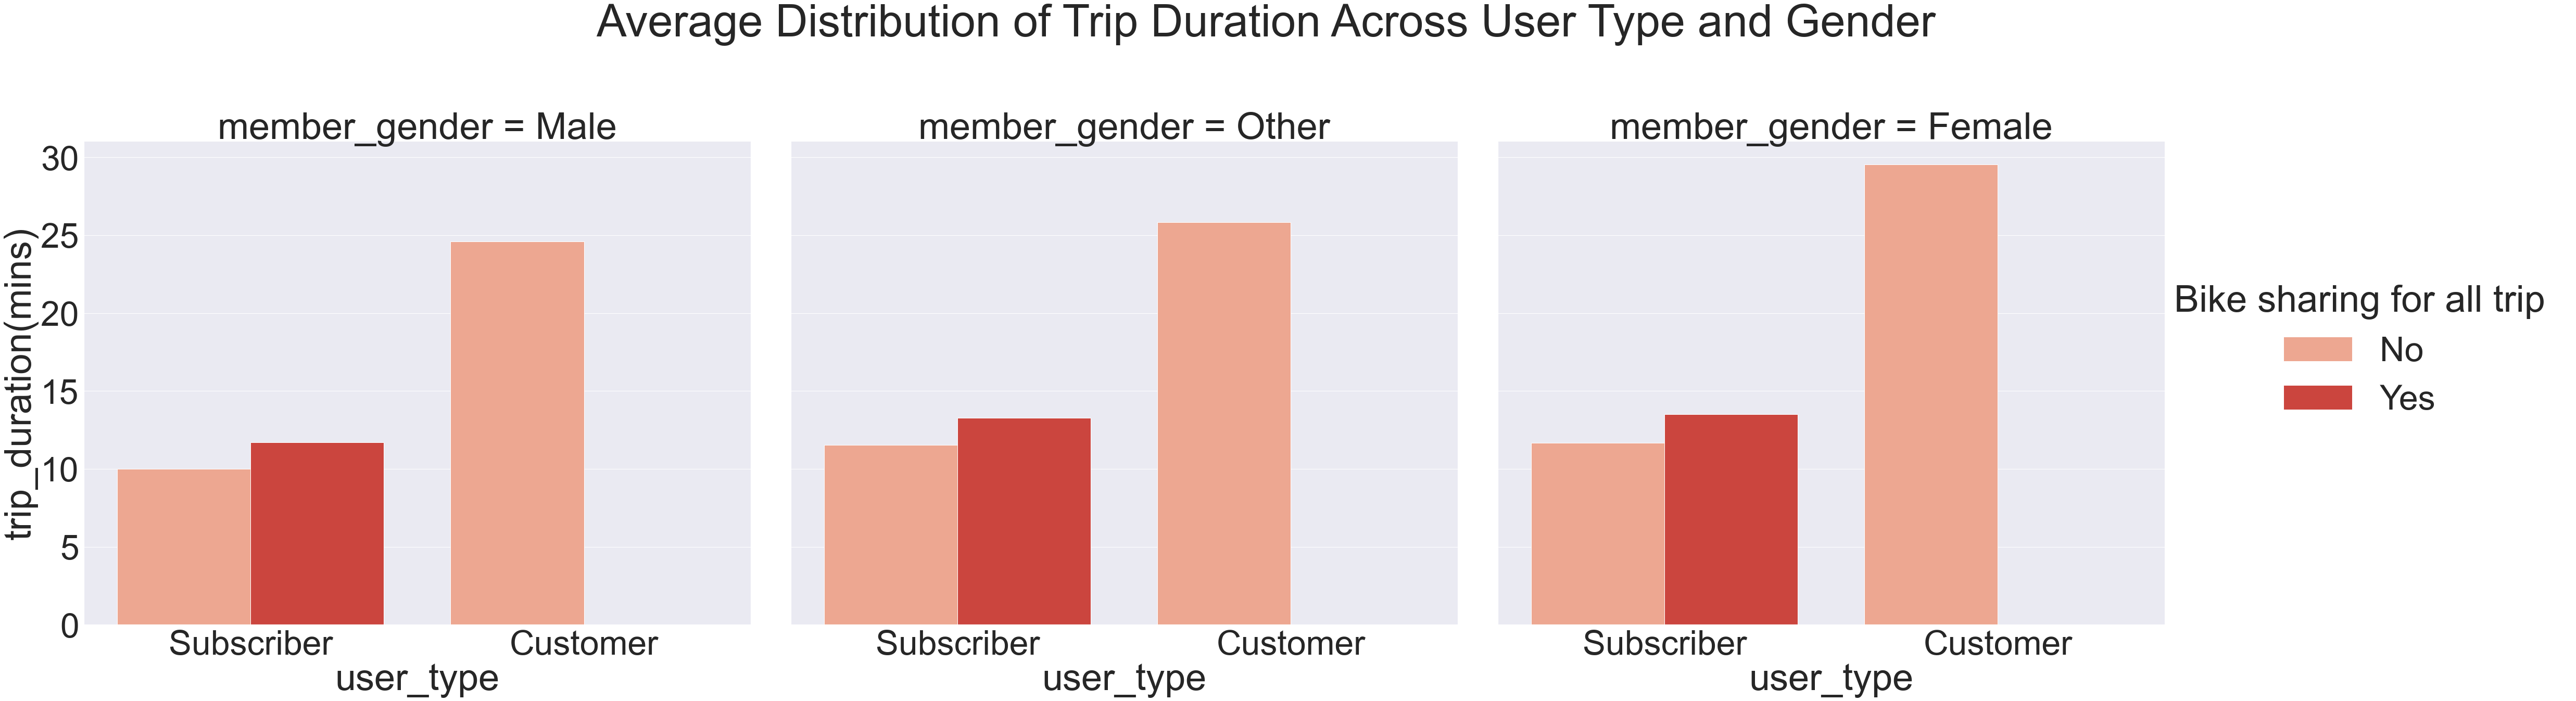

In [22]:
# Create facet grid

CreateFacetGrid(6,20,df,title,'barplot', 'member_gender','user_type','trip_duration(mins)',hue='bike_share_for_all_trip',palette='Reds',legend_title=legend_title)


### Trip counts across Hours of the day
The plots for the weekdays is bimodal which implies there are more trips between **7 to 9 hours of the morning** and around **16 hours and 18hours in the evenings**. However during the weekends, We observe the plots to be a bit bimodal. Most trips happen between 11 to 18 hours of the day. 

In [23]:
# Group data by hour and day of teh week

df=trip_data[['trip_duration(mins)','day_of_Week','hour']].groupby(['hour','day_of_Week']).mean()
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

title='Number of Trip per hour across the days of the week'
xticks=[3,6, 9,12,15, 18,21]


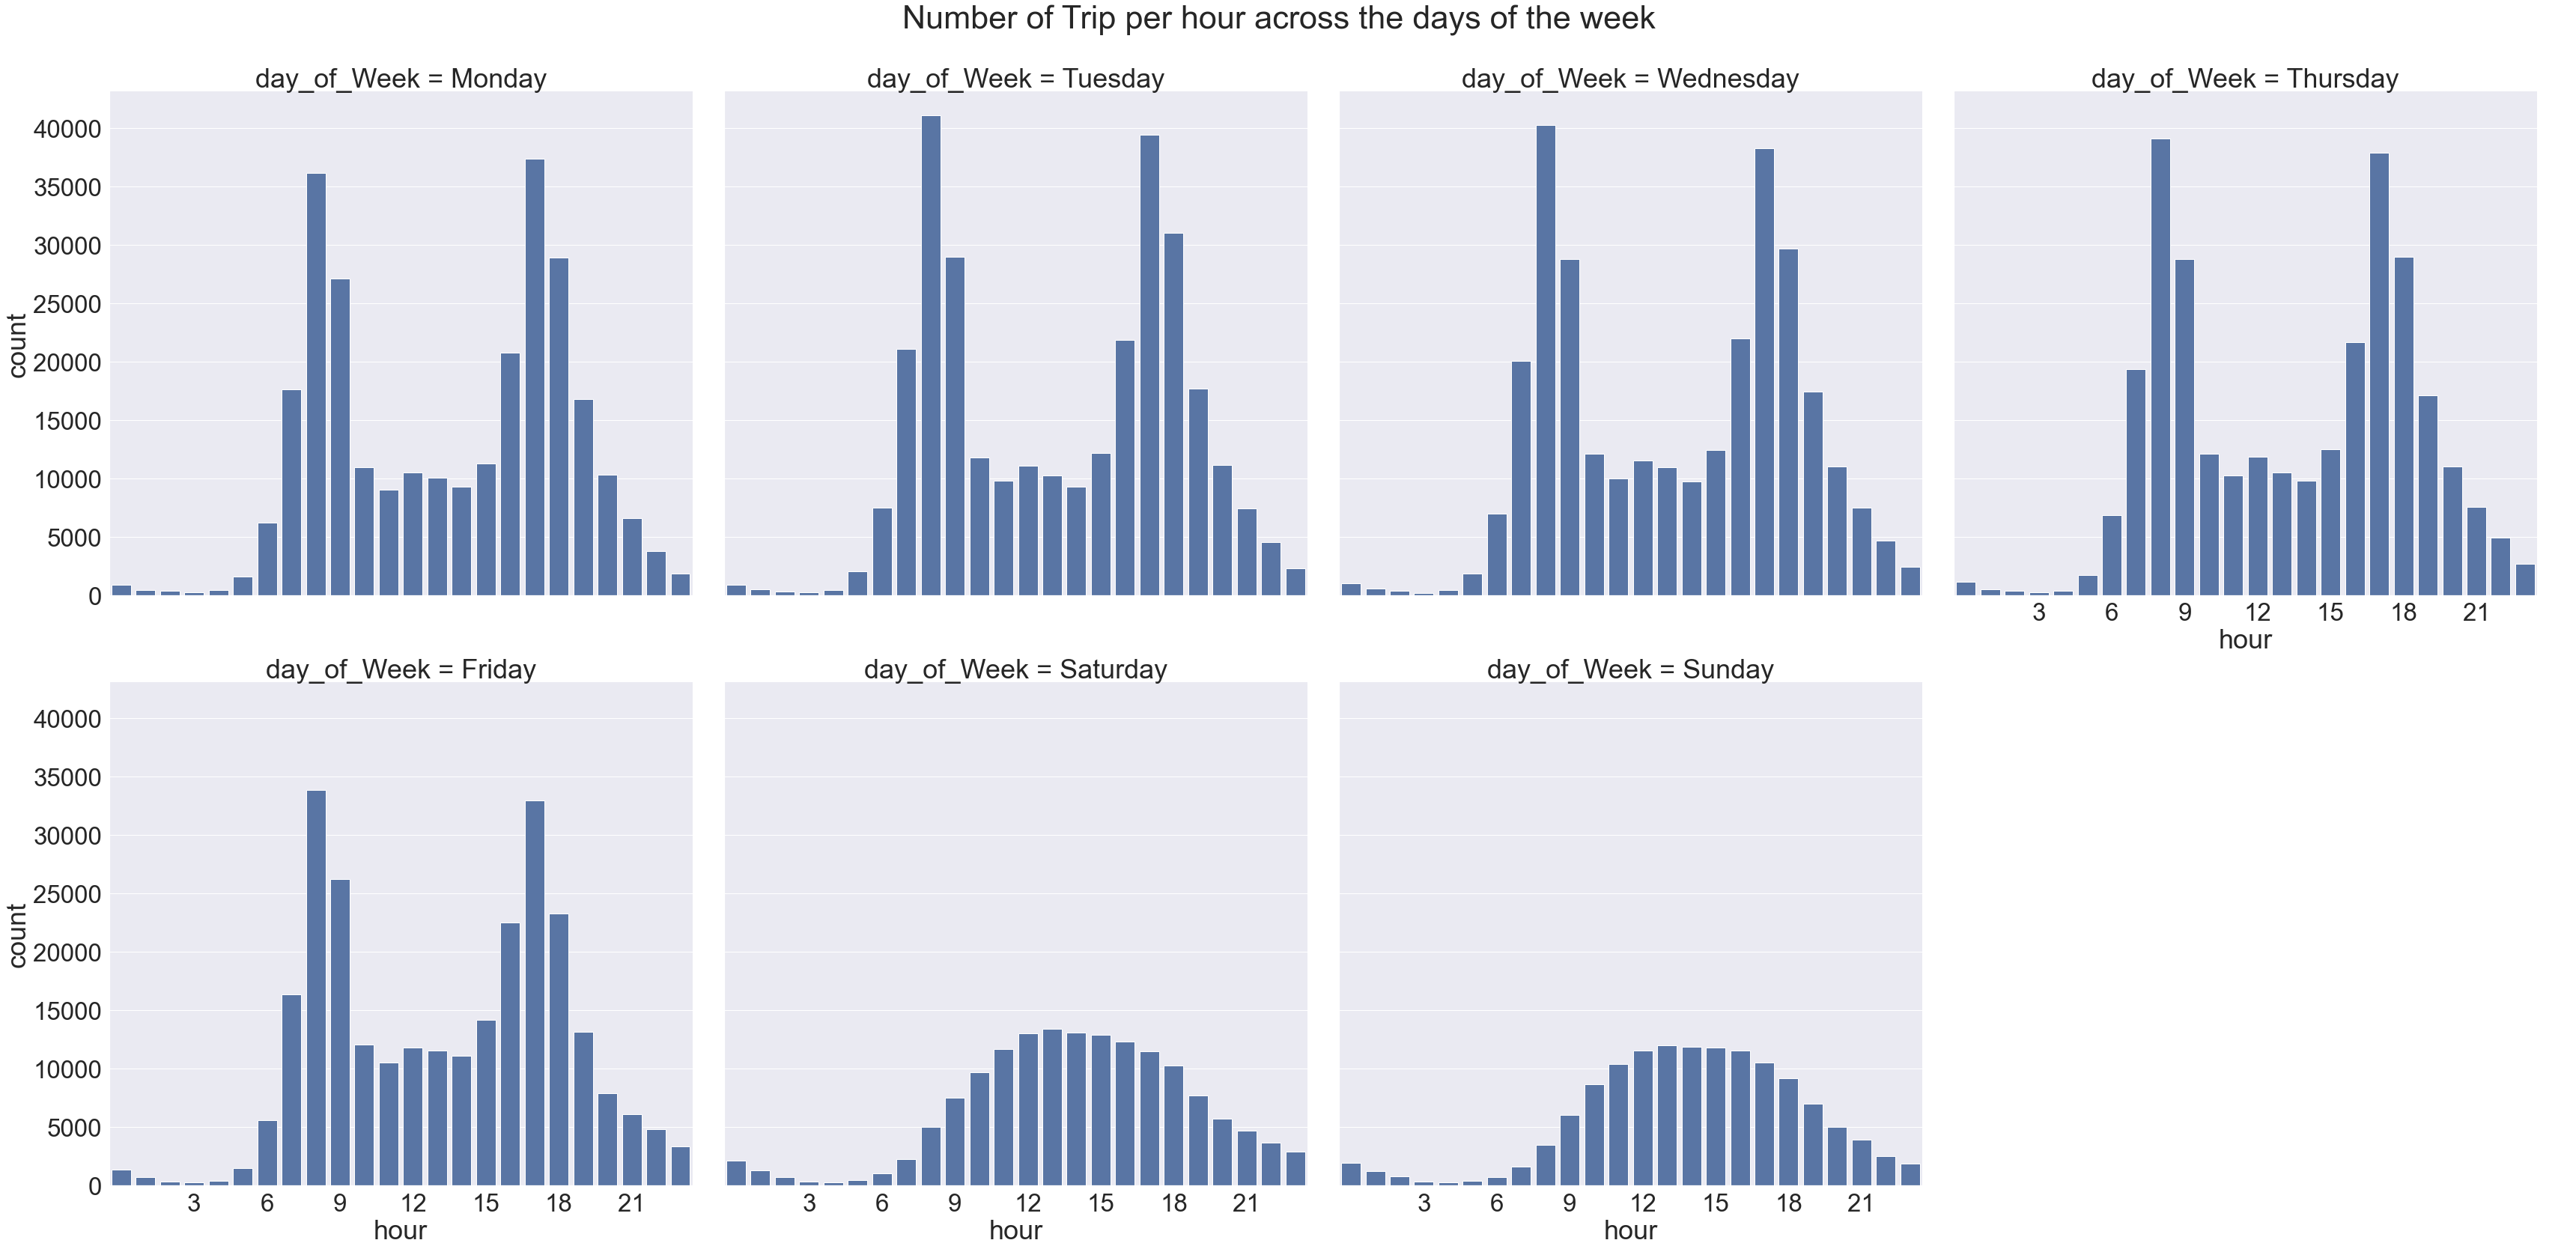

In [24]:
# Create facet grid
g=CreateFacetGrid(3,12,trip_data,title,'countplot', 'day_of_Week','hour','trip_duration(mins)',col_wrap=4,color='blue',col_order=cats)
g.set(xticks=xticks)


In [25]:

!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --no-prompt --TagRemovePreprocessor.remove_input_tags='{to_remove}' --post serve --SlidesExporter.reveal_theme=simple

C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\traitlets\traitlets.py:2202: FutureWarning: Supporting extra quotes around strings is deprecated in traitlets 5.0. You can use '{to_remove}' instead of "'{to_remove}'" if you require traitlets >=5.
  warn(
[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 1020728 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Hp\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  Fil